### **Step 1: Reading and Understanding the data**
##### Lets start with the following steps
##### 1. importing the data using pandas library
##### 2. understanding the structure of the data
 

In [9]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# read the dataset 
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
advertising.shape

(200, 4)

In [7]:
advertising.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

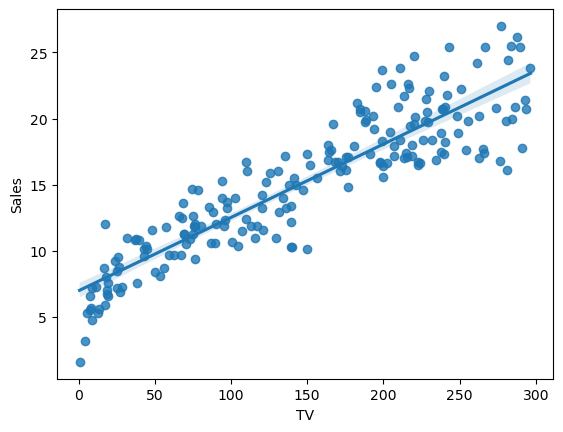

In [10]:
#Visualise the data/dataset
sns.regplot(x='TV', y='Sales', data=advertising)

<Axes: xlabel='Radio', ylabel='Sales'>

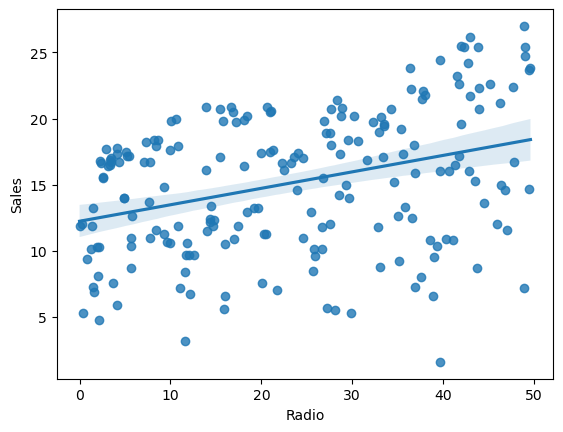

In [12]:
sns.regplot(x='Radio', y='Sales', data=advertising)

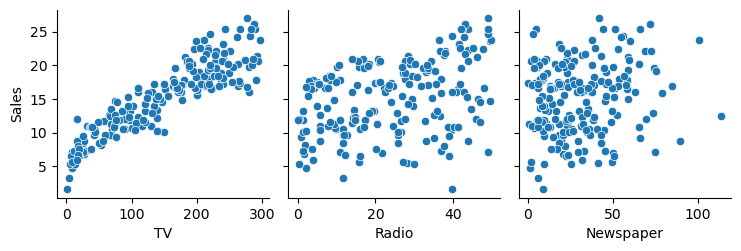

In [15]:
sns.pairplot(x_vars=['TV','Radio','Newspaper'], y_vars='Sales', data=advertising)

In [16]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

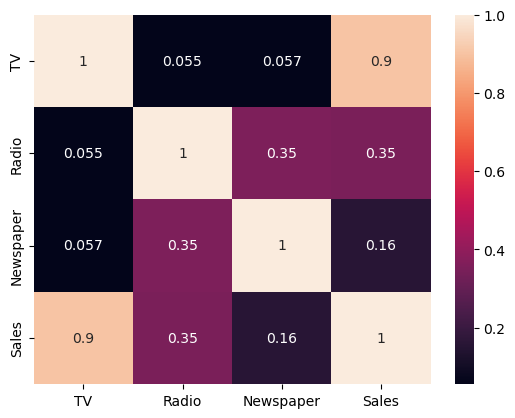

In [18]:
sns.heatmap(advertising.corr(), annot=True)

# **Step 2: Performing Simple Linear Regression**
#### Equation of linear regression
###### *y = c+m1x1+m2x2+...mnxn*
###### y is the response
###### c is the intercept 
###### m1 is the coefficient for the first feature
###### mn is the coefficient for the nth feature

#### in our case:
#### *y = c+m1+TV*

#### The m values are called the module coefficient or model parameters

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split


## Steps:
- Create x and y
- Create train and test sets (70-30, 80-20)
- Train your model on the training set (i.e. learn the coefficients)
- Evaluate the model (training set, test set)



In [26]:
# create x and y
X = advertising['TV']
y = advertising['Sales']


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [27]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.70, random_state=100)

In [29]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [31]:
#training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [34]:
#Fitting the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [37]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           1.52e-52
Time:                        10:49:14   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 1. coef and p-value
# 2. R-squared is 81.6%, very high which is good
# 3. p(F-statistic) is low => the fit in not by chance

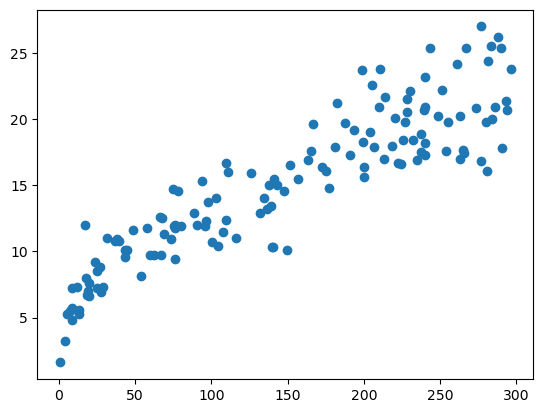

In [38]:
plt.scatter(X_train, y_train)


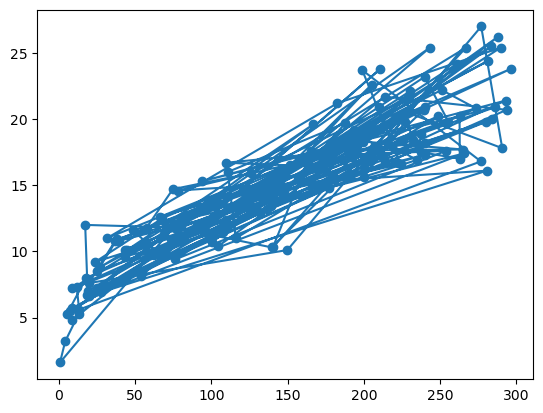

In [42]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 +  0.054*X_train, 'r')